## Analyzing a dataset and then communicating my findings about it using the Python libraries NumPy, pandas, and Matplotlib to make my analysis easier.

# Dataset Description
Info: This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, it consists of 21 columns each represent unique info about the movie as imdb_id, budget, revenue, genres & vote counts.

# Questions for Analysis

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?# 

In [43]:
# Import Python necessary  package essential for our analysis 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Data Wrangling

In [44]:
# Loading my data and printing out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
# Determine the shape of our dataset.
df.shape

(10866, 21)

In [46]:
# Display the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
# Finding the number of missing values for each column . 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [48]:
# Checking for duplicated rows:
df.duplicated().sum()

1

In [49]:
# Displaying the duplicate values
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


## Summary Statistics

In [50]:
# Display summary statistics for the dataset
df.describe()
# min value is a zero in ('budget','revenue','runtime','budget_adj',revenue_adj) which is treated as nan values as it's irrelevant for our analysis .


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [51]:
# displaying 0-valued data shape across our dataset.
zero_data=df[(df.revenue == 0)|(df.budget == 0)|(df.runtime == 0)]
zero_data.shape

(7011, 21)

In [52]:
# sample of 0-valued parameters in our dataset.
df[df.runtime==0].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3329,20414,tt1077026,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,NaN,Carlo Verdone,NaN,...,No overview found.,0,Family,Filmauro,3/7/08,35,5.3,2008,0.0,0.0
3884,105885,tt1754944,0.045198,0,0,eCupid,Houston Rhines|Andy Anderson|John Callahan|Gal...,NaN,J.C. Calciano,NaN,...,From the director of Is It Just Me? comes this...,0,Romance,NaN,6/23/11,12,4.6,2011,0.0,0.0
3857,289097,tt1288636,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,NaN,Stephen Kay,NaN,...,Cocky young attorney Michael Gray finds himsel...,0,Horror,Access Motion Pictures,6/10/11,13,5.2,2011,0.0,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0


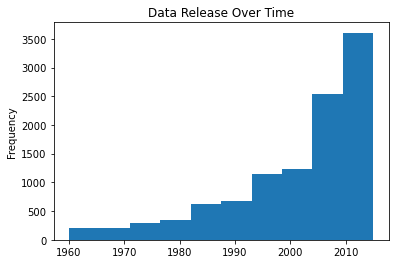

In [53]:
# data release over time 
df.release_year.plot(kind='hist',x="release_year",y="Distribution");
plt.title("Data Release Over Time")
plt.savefig('Data Release Over Time.png')
plt.show();


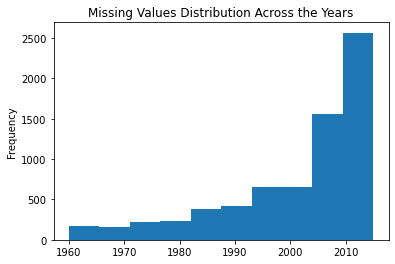

In [78]:
# Missing values distribution in (revenue,budget,runtime) across the years
zero_data.release_year.plot(kind='hist');
plt.title("Missing Values Distribution Across the Years")
plt.savefig('Missing Values Distribution Across the Years.png')
plt.show();
# Most of our dataset contain missing values, we will address that later.

In [55]:
# Display frequency of our Movie genres & cast.
display(df.genres.value_counts())
print('-'*80)
display(df.cast.value_counts())

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

--------------------------------------------------------------------------------


Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

# Data Cleaning

In [56]:
# Column indexes/labels
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [57]:
# Dropping irrelevant columns for our current analysis
#df.drop(
   # ['homepage','tagline','production_companies','keywords','overview'\
    # ,'imdb_id','id','release_date'], inplace = True, axis = 1)

In [58]:
# check for data change
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [22]:
# Dropping any missing values (NANs)
df.dropna(inplace = True)

In [59]:
# Dropping rows that contain zeros values in (revenue_adj,budget_adj,runtime)
zero_data = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]
df.drop(zero_data.index,inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
# Info of newly-cleaned data
df.info()
# With this, we can confirmed that our dataset is clean & ready for usuage for furthur analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3855 non-null   int64  
 1   imdb_id               3855 non-null   object 
 2   popularity            3855 non-null   float64
 3   budget                3855 non-null   int64  
 4   revenue               3855 non-null   int64  
 5   original_title        3855 non-null   object 
 6   cast                  3851 non-null   object 
 7   homepage              1426 non-null   object 
 8   director              3854 non-null   object 
 9   tagline               3575 non-null   object 
 10  keywords              3717 non-null   object 
 11  overview              3855 non-null   object 
 12  runtime               3855 non-null   int64  
 13  genres                3855 non-null   object 
 14  production_companies  3809 non-null   object 
 15  release_date        

In [61]:
# Sample of our clean dataset
df.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6738,7304,tt0404390,0.433874,15000000,9500000,Running Scared,Paul Walker|Cameron Bright|Vera Farmiga|Chazz ...,http://www.runningscaredthemovie.com/,Wayne Kramer,Every bullet leaves a trail.,...,"After a drug-op gone bad, Joey Gazelle is put ...",122,Action|Crime|Drama|Thriller,International Production Company|True Grit Pro...,1/6/06,174,6.8,2006,1.622504e+07,1.027586e+07
636,205596,tt2084970,8.110711,14000000,233555708,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,http://theimitationgamemovie.com/,Morten Tyldum,The true enigma was the man who cracked the code.,...,Based on the real life story of legendary cryp...,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08
9602,865,tt0093894,1.354524,27000000,38122105,The Running Man,Arnold Schwarzenegger|Richard Dawson|MarÃ­a Co...,NaN,Paul Michael Glaser,A game nobody survives. But Schwarzenegger has...,...,"By 2017, the global economy has collapsed and ...",101,Action|Science Fiction,Keith Barish Productions|TAFT Entertainment Pi...,11/13/87,352,6.3,1987,5.181517e+07,7.315939e+07
3554,47760,tt1498569,0.601594,8000000,163265,Restless,Mia Wasikowska|Henry Hopper|Ryo Kase|Schuyler ...,http://www.restlessmovie.com/,Gus Van Sant,Who do you live for?,...,"A powerful and emotional coming of age story, ...",91,Drama|Romance,Columbia Pictures|Imagine Entertainment|360 Pi...,9/16/11,93,6.3,2011,7.755184e+06,1.582688e+05
85,296099,tt1524930,2.000338,31000000,104384188,Vacation,Ed Helms|Christina Applegate|Skyler Gisondo|St...,NaN,John Francis Daley|Jonathan M. Goldstein,What could go wrong?,...,Hoping to bring his family closer together and...,99,Adventure|Comedy,New Line Cinema|BenderSpink|David Dobkin Produ...,7/28/15,846,6.1,2015,2.851999e+07,9.603341e+07
4128,15186,tt0290212,0.192065,2000000,2506446,Full Frontal,David Duchovny|Nicky Katt|Catherine Keener|Mar...,NaN,Steven Soderbergh,Everybody Needs A Release,...,"A contemporary comedy set in Los Angeles, Full...",96,Comedy|Drama|Romance,Miramax Films|Populist Pictures|Monophonic Inc.,8/2/02,12,4.7,2002,2.424523e+06,3.038468e+06
3466,58233,tt1634122,1.048895,45000000,160078586,Johnny English Reborn,Rowan Atkinson|Dominic West|Gillian Anderson|R...,http://www.johnnyenglishreborn.com/,Oliver Parker,Laugh at the face of danger,...,Johnny English Reborn is a 2011 British spy co...,101,Crime|Adventure|Action|Comedy|Thriller,Universal Pictures,9/15/11,689,6.0,2011,4.362291e+07,1.551799e+08
8919,16281,tt0083767,0.441852,8000000,21028755,Creepshow,Leslie Nielsen|Ed Harris|Hal Holbrook|Ted Dans...,NaN,George A. Romero,The Most Fun You'll Ever Have... BEING SCARED!,...,"Inspired by the E.C. comics of the 1950s, Geor...",120,Horror|Comedy|Fantasy,Warner Bros.|Creepshow Films Inc.|Laurel Enter...,11/12/82,90,6.7,1982,1.807714e+07,4.751747e+07
10728,576,tt0065214,0.615889,6244087,638641,The Wild Bunch,Ernest Borgnine|William Holden|Robert Ryan|Edm...,NaN,Sam Peckinpah,If you only want to spend two hours in a movie...,...,Aging outlaw Pike Bishop (William Holden) prep...,145,Adventure|Western,Warner Brothers/Seven Arts,6/17/69,121,7.2,1969,3.711650e+07,3.796251e+06
3636,9364,tt1181614,0.414629,8000000,100915,Wuthering Heights,Kaya Scodelario|James Northcote|Amy Wren|Nicho...,http://www.artificial-eye.com/film.php?cinema=...,Andrea Arnold,Love is a force of nature.,...,A poor boy of unknown origins is rescued from ...,129,Drama|Romance,Ecosse Films|Film4 Productions,9/5/11,36,5.6,2011,7.755184e+06,9.782680e+04


In [62]:
# Descriptive statistics of our cleaned dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
# Sorting data release data into decades for Exploratory analysis by using pd.cut() function.
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)

In [64]:
df.release_year.value_counts()

2000s    1533
2010s     862
1990s     808
1980s     425
1970s     145
1960s      77
Name: release_year, dtype: int64

In [65]:
# Seperating data contained in Cast & Genres into Multiple values
def seprate_values(col):
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [66]:
df_gen = seprate_values('genres')

In [67]:
df_cast = seprate_values('cast')

In [68]:
df['cast'],df['genres']=df_cast['cast_1'],df_gen['genres_1']

In [69]:
display(df['cast'].value_counts().nlargest(10))
print('-'*60)
display(df['genres'].value_counts().nlargest(10))

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Tom Hanks                28
Robert De Niro           28
Denzel Washington        28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast, dtype: int64

------------------------------------------------------------


Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Name: genres, dtype: int64

# Exploratory Data Analysis


## Research Question 1 - Which genres are most popular from year to year? 

In [70]:
df.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,12,15,1,10,6,0,18,1,0,2,3,2,1,0,1,0,0,1,4
1970s,28,15,2,18,12,0,34,1,2,0,18,2,2,1,7,0,2,0,1
1980s,73,51,5,83,17,3,71,4,21,0,52,4,1,4,20,0,13,3,0
1990s,159,53,16,174,43,2,184,7,29,4,52,5,9,19,18,1,31,1,1
2000s,269,128,44,351,58,21,369,16,40,4,94,9,15,23,25,0,53,7,7
2010s,146,52,35,149,36,6,213,11,18,7,56,7,8,19,27,0,61,8,3


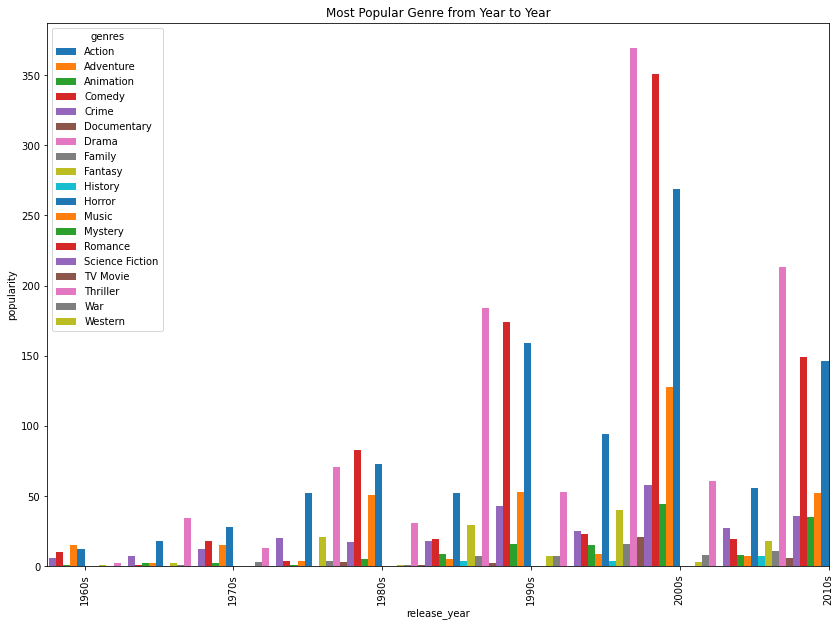

In [71]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');
plt.title("Most Popular Genre from Year to Year")
plt.savefig('Most Popular Genre from Year to Year.png')
plt.show();

This question shows that the most popular genres differed a lot according to the respective decade as well as The Top Three Genres for each decade are:

1960s: Adventure, Action, Comedy.

1970s: Drama, Action, Horror, Comedy.

1980s: Comedy, Drama, Action.

1990s: Drama, Comedy, Action.

2000s: Drama, Comedy, Action.

2010s: Drama, Comedy, Action.

## Research Question 2 - What kinds of properties are associated with movies that have high revenues?

In [74]:
# Correlation between Revenue and Popularity

corr_matrix = df[df['revenue'] != 0].corr()

In [75]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue         1.000000
revenue_adj     0.900892
vote_count      0.754583
budget          0.688548
budget_adj      0.657577
popularity      0.615556
runtime         0.250398
vote_average    0.227279
id             -0.003212
Name: revenue, dtype: float64

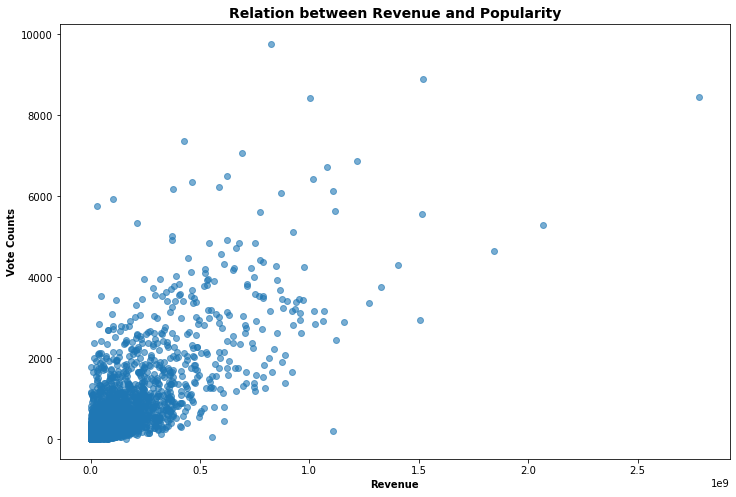

In [76]:
# Plotting the correrelation between revenue & vote counts
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(df['revenue'],
            df['vote_count'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
plt.title("Relation between Revenue and Popularity", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Revenue", weight = "bold")
plt.ylabel("Vote Counts", weight = "bold")
plt.show()

- There are positive correlations between popularity and revenue.
- This means that the popularity of a movie indicates it wouldd return a higher revenue
- Adequate marketing for the movie is highly recommended.

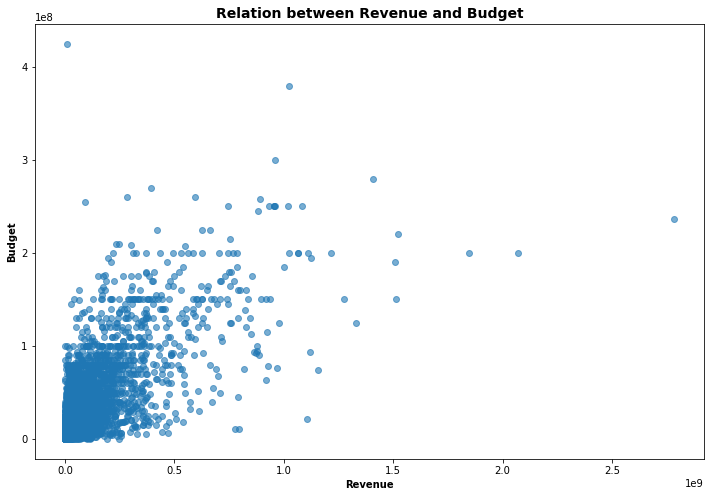

In [77]:
# Correlation between Budget & Revenue

# Plotting revenue against budget:
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(df['revenue'],
            df['budget'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
plt.title("Relation between Revenue and Budget", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Revenue", weight = "bold")
plt.ylabel("Budget", weight = "bold")
plt.show()

- There are positive correlations between the two factors
- Meaning a proper budget is a vital reason for movie's success.

# Conclusions

This dataset is very rich in information. Some limitations the dataset contained were null and zero values in some columns and rows. These zero and null values hinder the analysis and had to be removed from the rows that correspond to these zero and null values. Furthermore zero values create false results during the correlation plots. Hence, data cleaning is a necessary part before moving on to the dataset's investigation. Finally there is a positive correlation between some of the features of the TMDb dataset.

